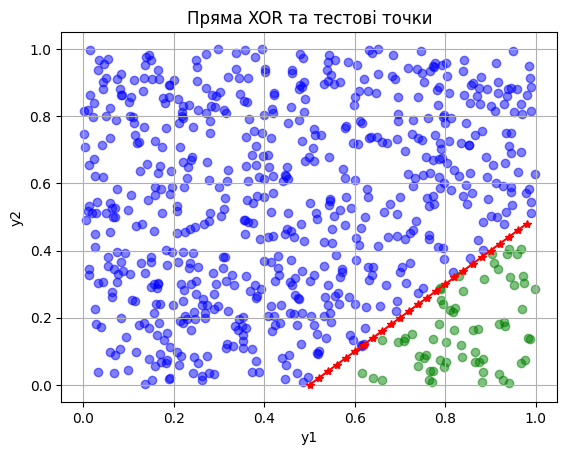

In [1]:

import numpy as np
from matplotlib import pyplot as plt

k = 50
a = 0
b = 1
step = (b-a)/k

# OR: x1 + x2 - 0.5 = 0  →  x2 = -x1 + 0.5
def line_or(x):
    return -x + 0.5

# AND: x1 + x2 - 1.5 = 0  →  x2 = -x1 + 1.5
def line_and(x):
    return -x + 1.5

# AND: y1 - y2 - 0.5 = 0  →  y2 = y1 - 0.5
def line_xor(y):
    return y - 0.5

t = a
mass_X1 = [a]
for i in range(k):
  if t <= b:
    t = t + step
    mass_X1.append(t)

# OR
mass_X2_or = []
mass_X1_0_or = []
for j in range(k):
    f = line_or(mass_X1[j])
    if f >= 0:
        mass_X2_or.append(f)
        mass_X1_0_or.append(mass_X1[j])

# AND
mass_X2_and = []
mass_X1_0_and = []
for j in range(k):
    f = line_and(mass_X1[j])
    if f >= 0:
        mass_X2_and.append(f)
        mass_X1_0_and.append(mass_X1[j])

mass_X2_xor = []
mass_X1_0_xor = []
for j in range(k):
    f = line_xor(mass_X1[j])
    if f >= 0:
        mass_X2_xor.append(f)
        mass_X1_0_xor.append(mass_X1[j])

# Побудова прямої
plt.plot(mass_X1_0_xor, mass_X2_xor, c='red', marker='*', label="XOR boundary")

mass_test_date = []
len_mass_test = 700
long = 1
for i in range(len_mass_test):
  x = 0
  vnutr_mass = []
  while x <= long:
    g = np.random.random()
    vnutr_mass.append(g)
    x += 1
  mass_test_date.append(vnutr_mass)

def AND(x1, x2):
    return 1 if x1 + x2 - 1.5 > 0 else 0

def OR(x1, x2):
    return 1 if x1 + x2 - 0.5 > 0 else 0


def XOR(y1, y2):
    return 1 if y1 - y2 - 0.5 > 0 else 0

# XOR через OR і AND
def classify(x1, x2):
    y1 = OR(x1, x2)
    y2 = AND(x1, x2)
    return AND(y1, 1 - y2)

mass_X1_class_A = []
mass_X2_class_A = []
mass_X1_class_B = []
mass_X2_class_B = []

def Klassification(x1, x2):
  if classify(x1, x2):
    mass_X1_class_A.append(x1)
    mass_X2_class_A.append(x2)
  else:
    mass_X1_class_B.append(x1)
    mass_X2_class_B.append(x2)

for x1, x2 in mass_test_date:
        Klassification(x1, x2)

# Візуалізація
for x, y in zip(mass_X1_class_A, mass_X2_class_A):
    color = 'green' if XOR(x, y) == 1 else 'blue'
    plt.scatter(x, y, c=color, alpha=0.5)

for x, y in zip(mass_X1_class_B, mass_X2_class_B):
    plt.scatter(x, y, c='blue', alpha=0.5)

plt.title("Пряма XOR та тестові точки")
plt.xlabel("y1")
plt.ylabel("y2")
plt.grid(True)
plt.show()
